In [1]:
import jax
jax.config.update('jax_disable_jit', False) # Turn off JIT because of an issue in shortwave_radiation.py:169
jax.config.update("jax_debug_infs", True) # doesn't add any time since the saved time is otherwise spent getting the nodal quantities
jax.config.update("jax_debug_nans", False) # some physics fields might be nan

In [2]:
from jcm.model import Model, get_coords
from jcm.physics.icon.icon_physics import IconPhysics
from jcm.boundaries import initialize_boundaries

realistic_boundaries = lambda coords=get_coords(): initialize_boundaries(
    '../jcm/data/bc/t30/clim/boundaries_daily.nc',
    coords.horizontal,
)

In [3]:
model = Model(
    save_interval=3,
    total_time=36,
    physics=IconPhysics()
    # boundaries=realistic_boundaries(),
)
state = model.get_initial_state()
final_state, predictions = model.unroll(state)

In [10]:
predictions['physics'].cloud_data

{'cloud_fraction': Array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., 

In [5]:
pred_ds = model.predictions_to_xarray(predictions)

AttributeError: 'dict' object has no attribute 'shape'

In [ ]:
print(f"dataset size: {pred_ds.nbytes/1e6:.1f}MB")

dataset size: 334.4MB


In [ ]:
pred_ds.coords

Coordinates:
  * lon      (lon) float64 768B 0.0 3.75 7.5 11.25 ... 345.0 348.8 352.5 356.2
  * lat      (lat) float64 384B -87.16 -83.48 -79.78 ... 79.78 83.48 87.16
  * level    (level) float32 32B 0.95 0.835 0.685 0.51 0.34 0.2 0.095 0.025
  * time     (time) datetime64[ns] 96B 2000-01-01 2000-01-04 ... 2000-02-03

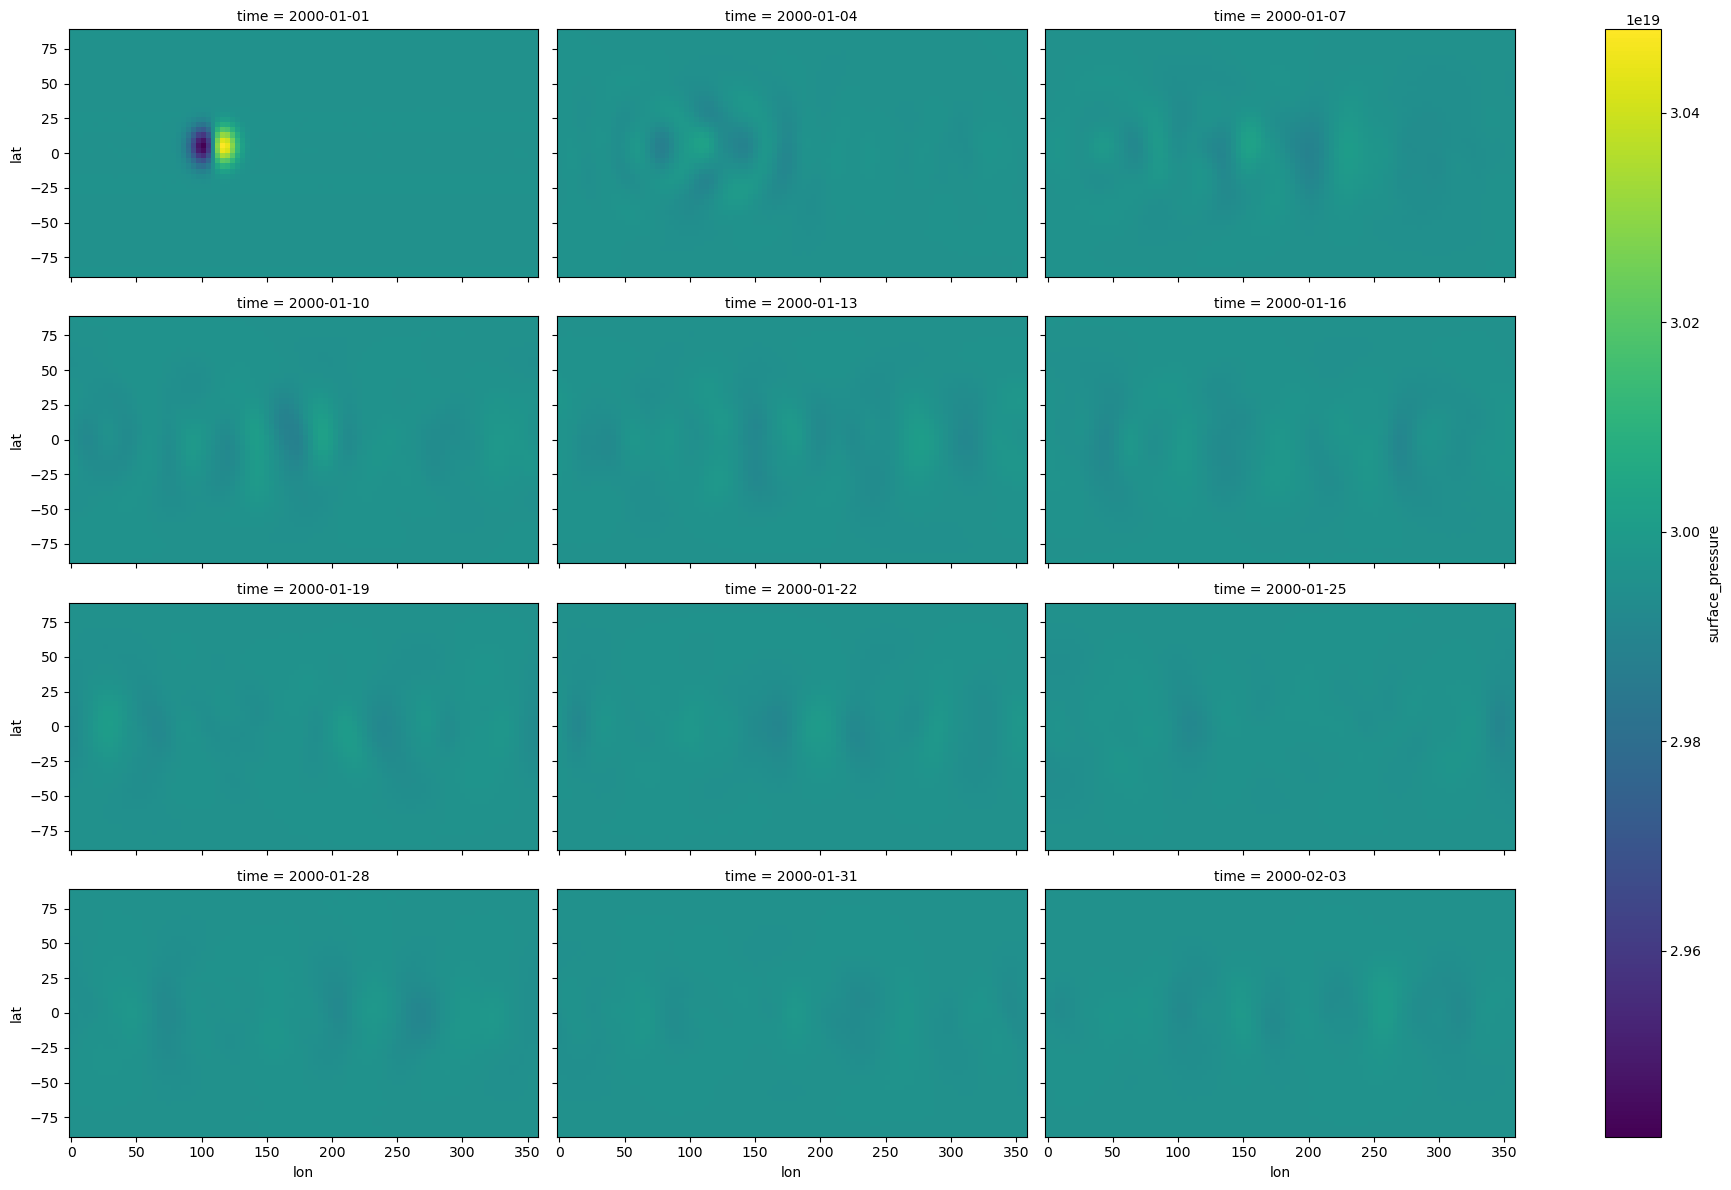

In [ ]:
pred_ds['surface_pressure'].plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2);

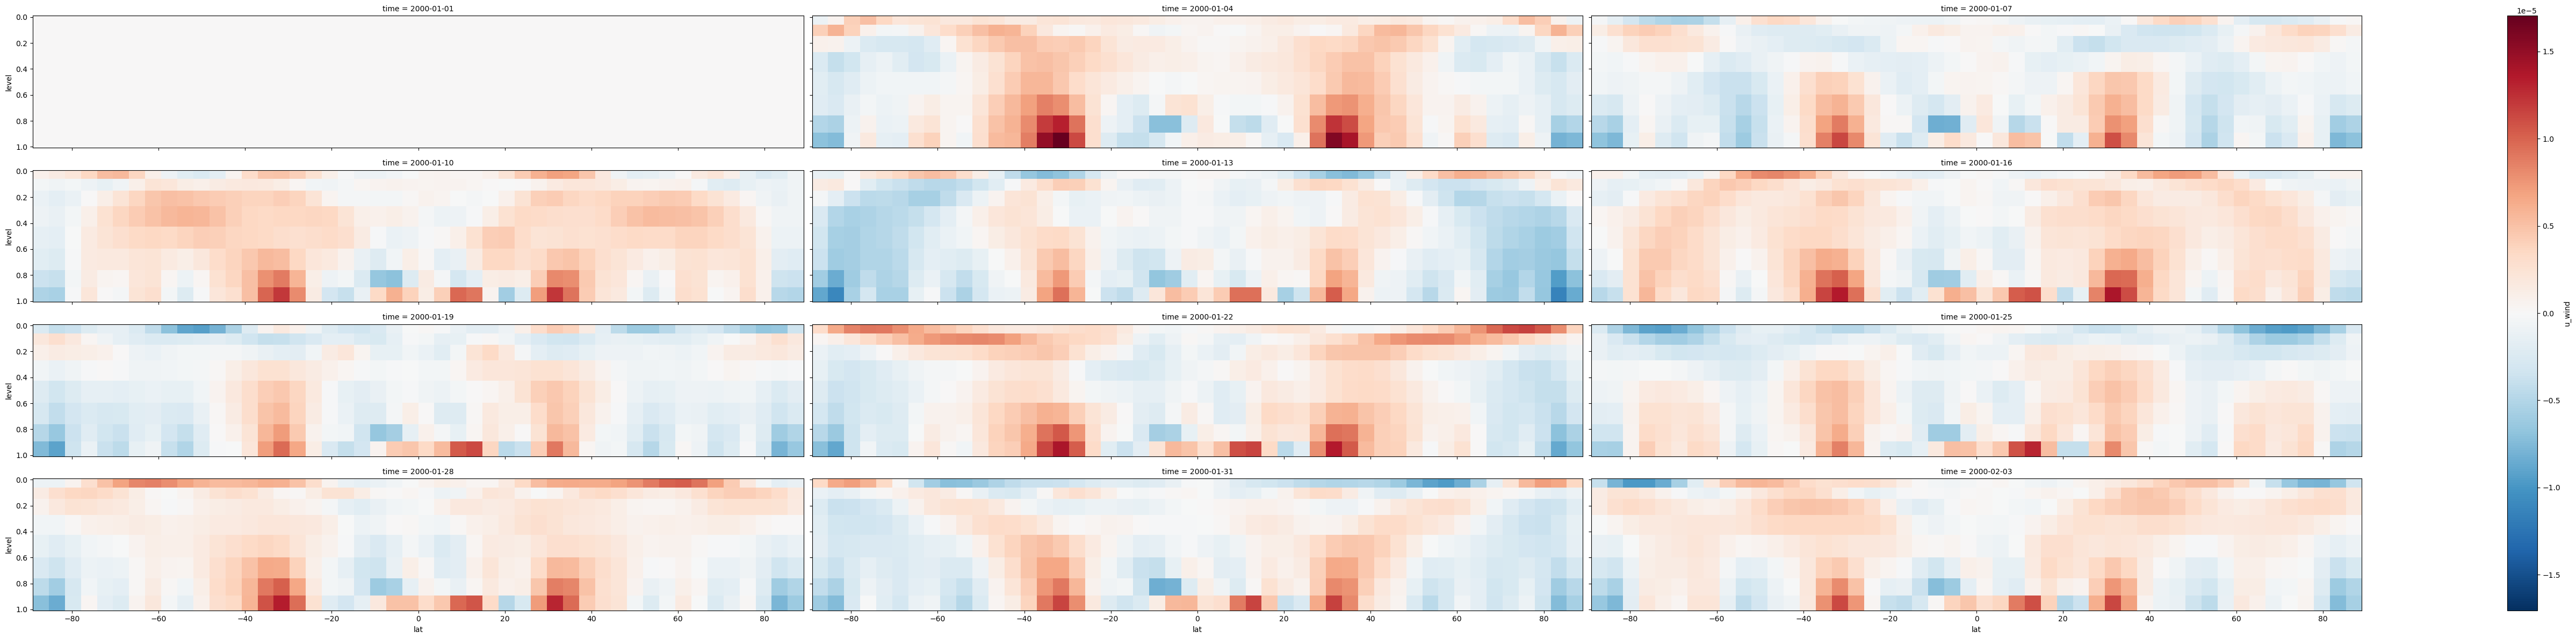

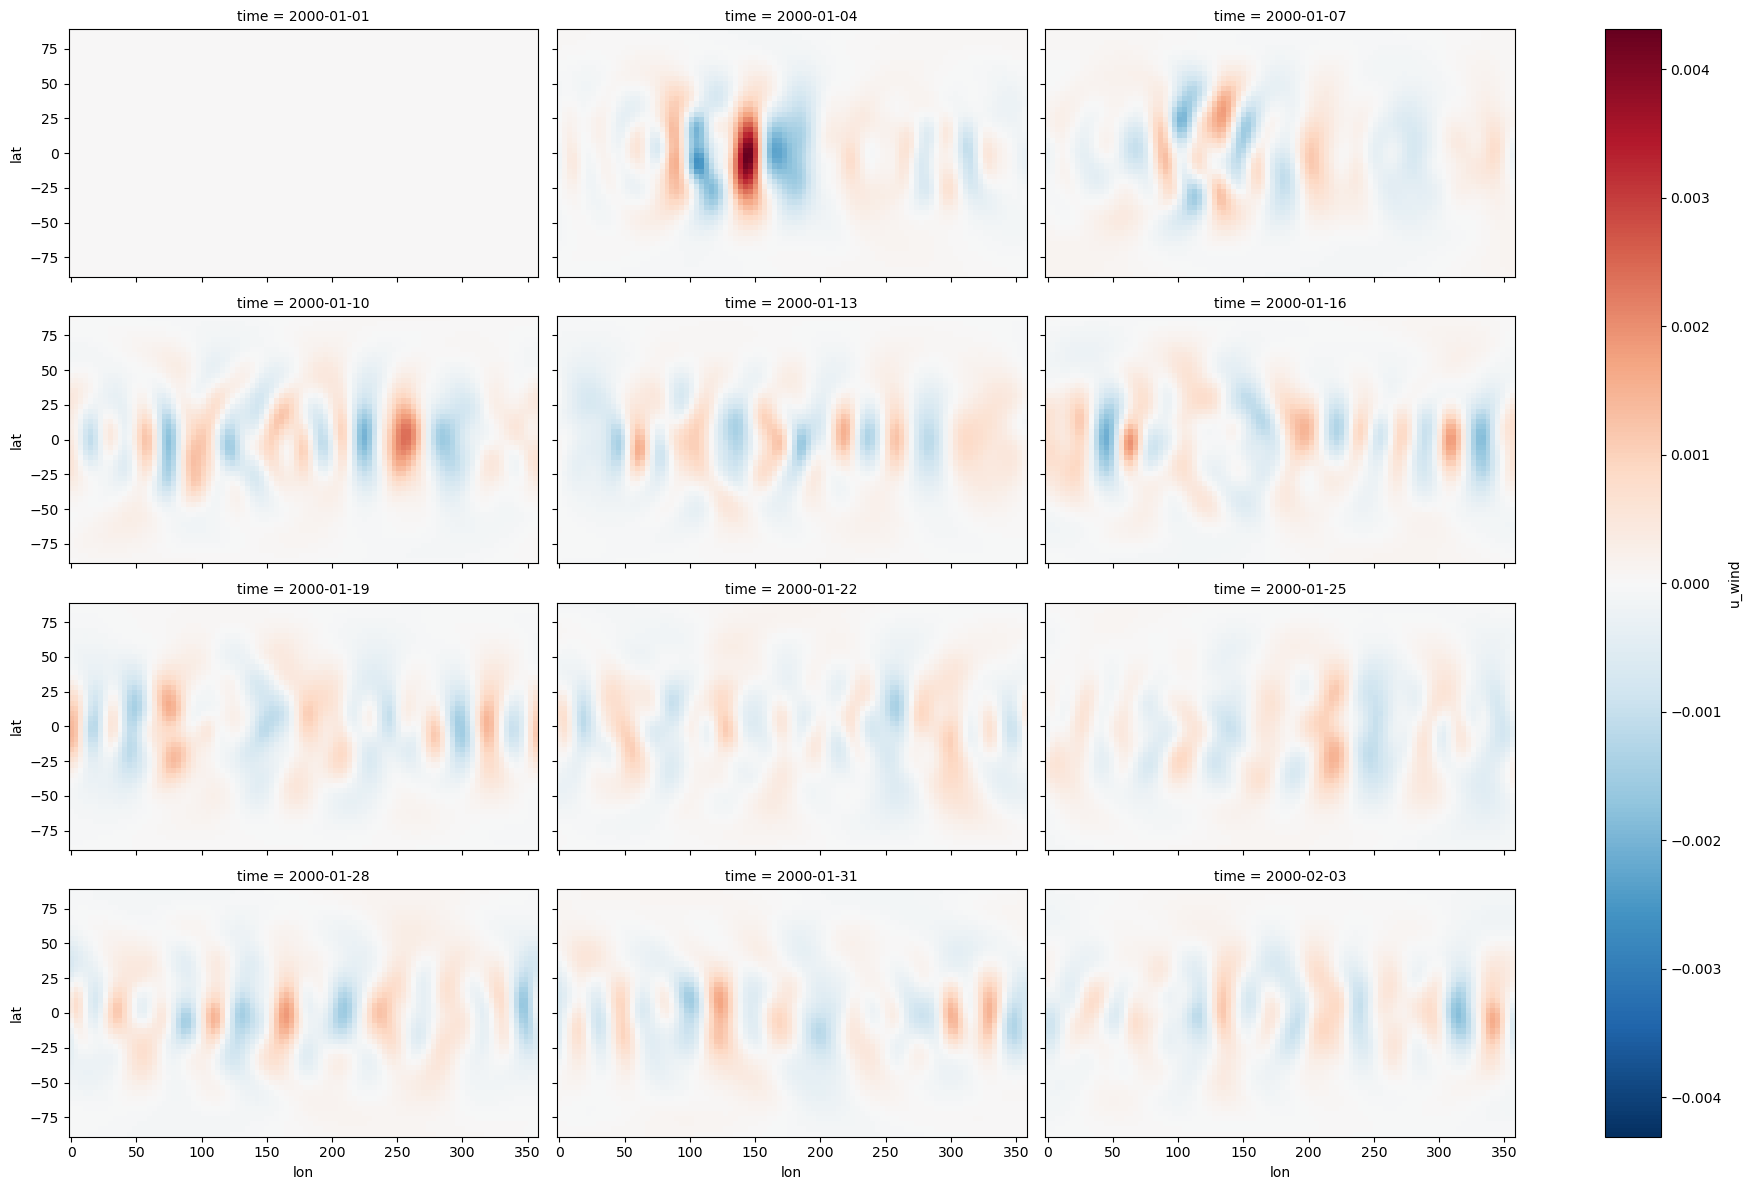

In [ ]:
pred_ds['u_wind'].mean('lon').plot(x='lat', y='level', col='time', col_wrap=3, aspect=6, yincrease=False);
pred_ds['u_wind'].isel(level=-1).plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2);

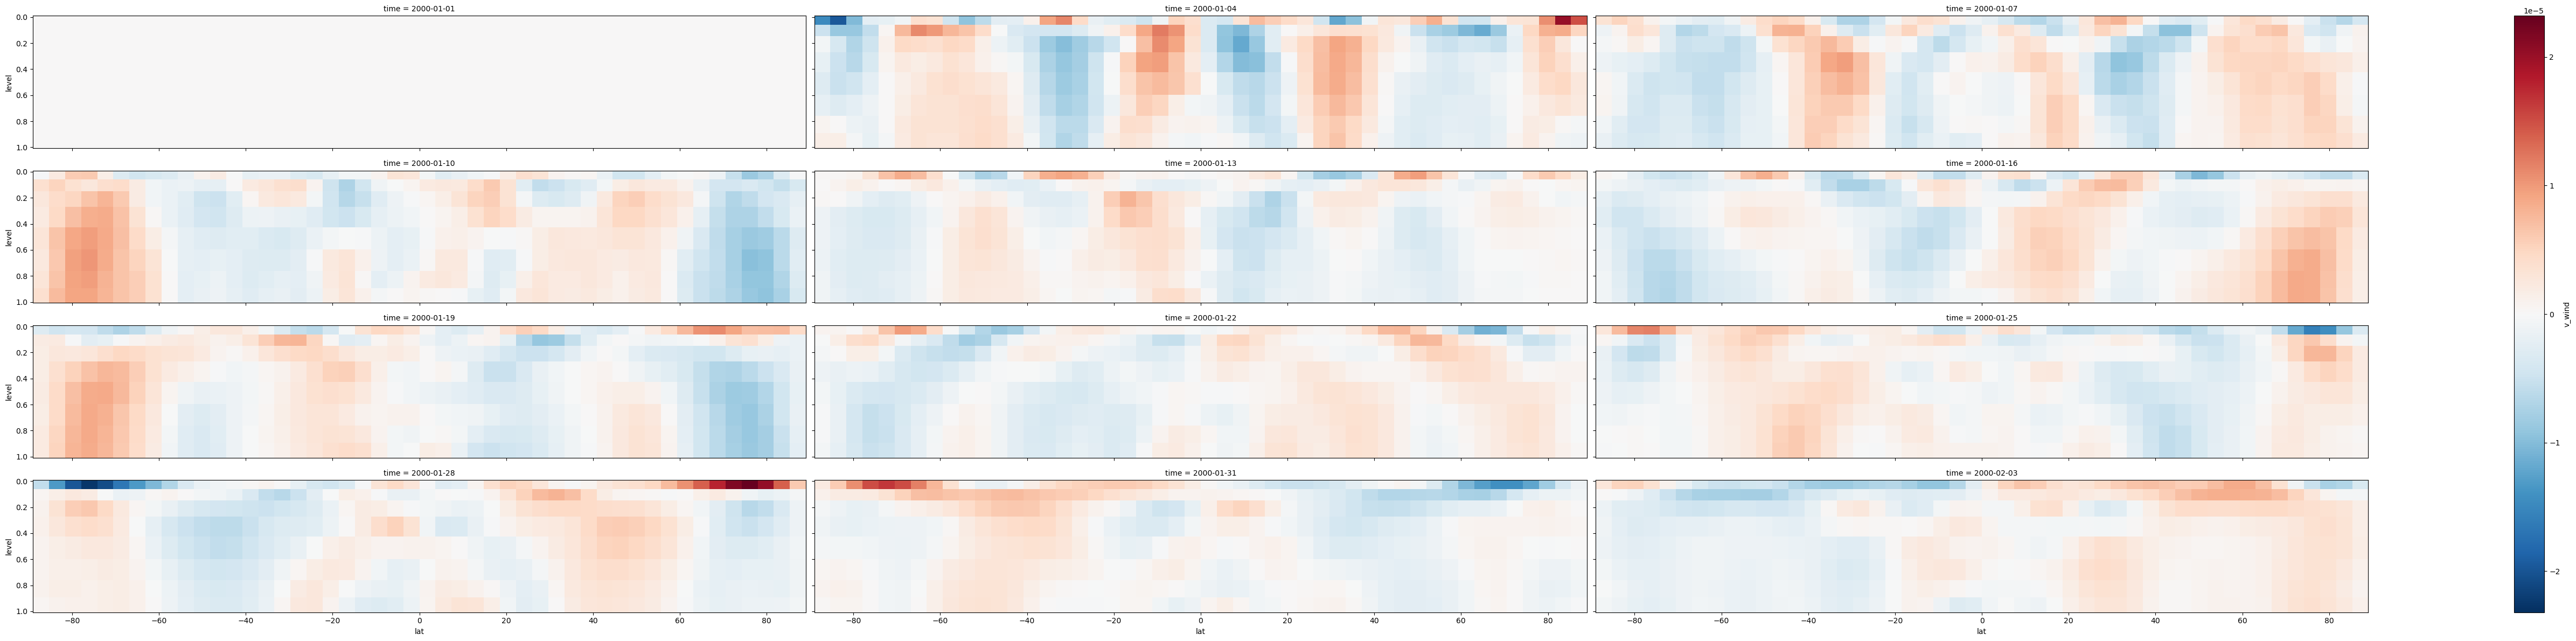

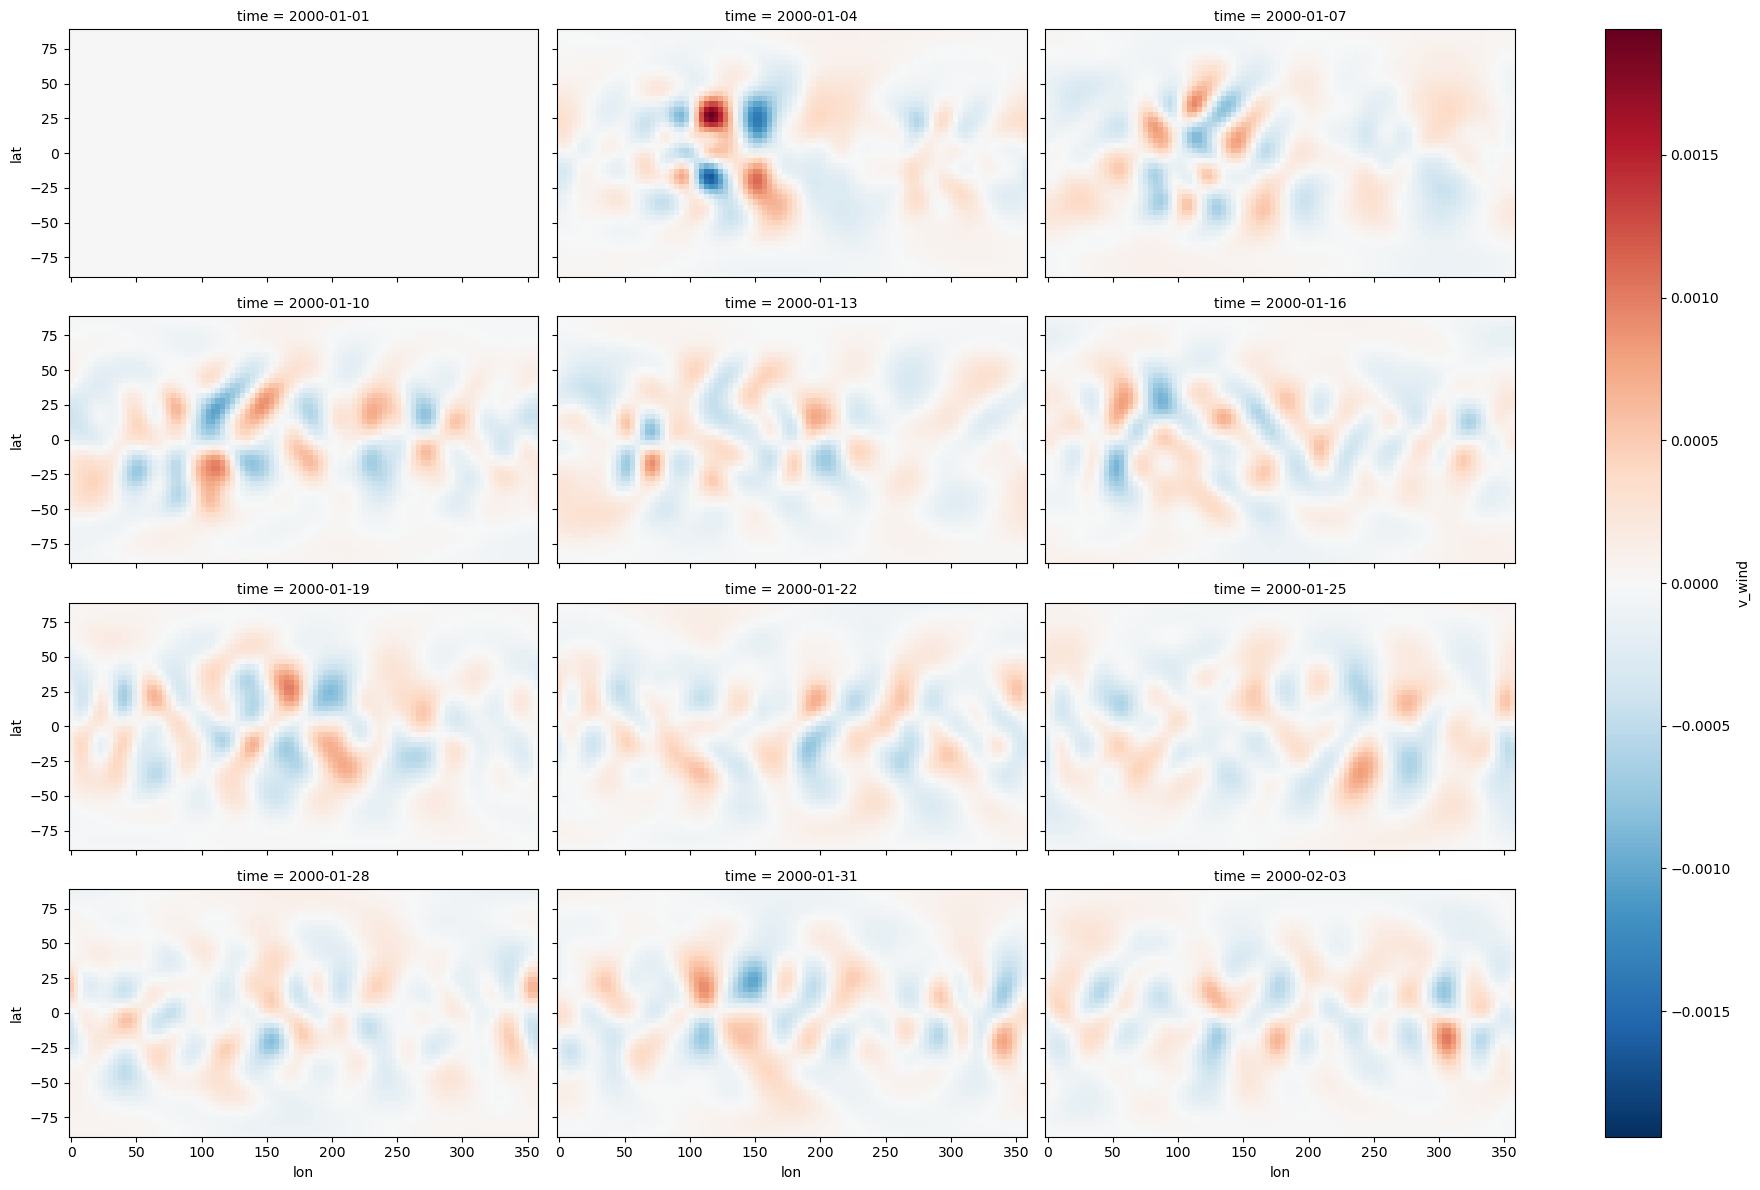

In [ ]:
pred_ds['v_wind'].mean('lon').plot(x='lat', y='level', col='time', col_wrap=3, aspect=6, yincrease=False);
pred_ds['v_wind'].isel(level=-1).plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2);

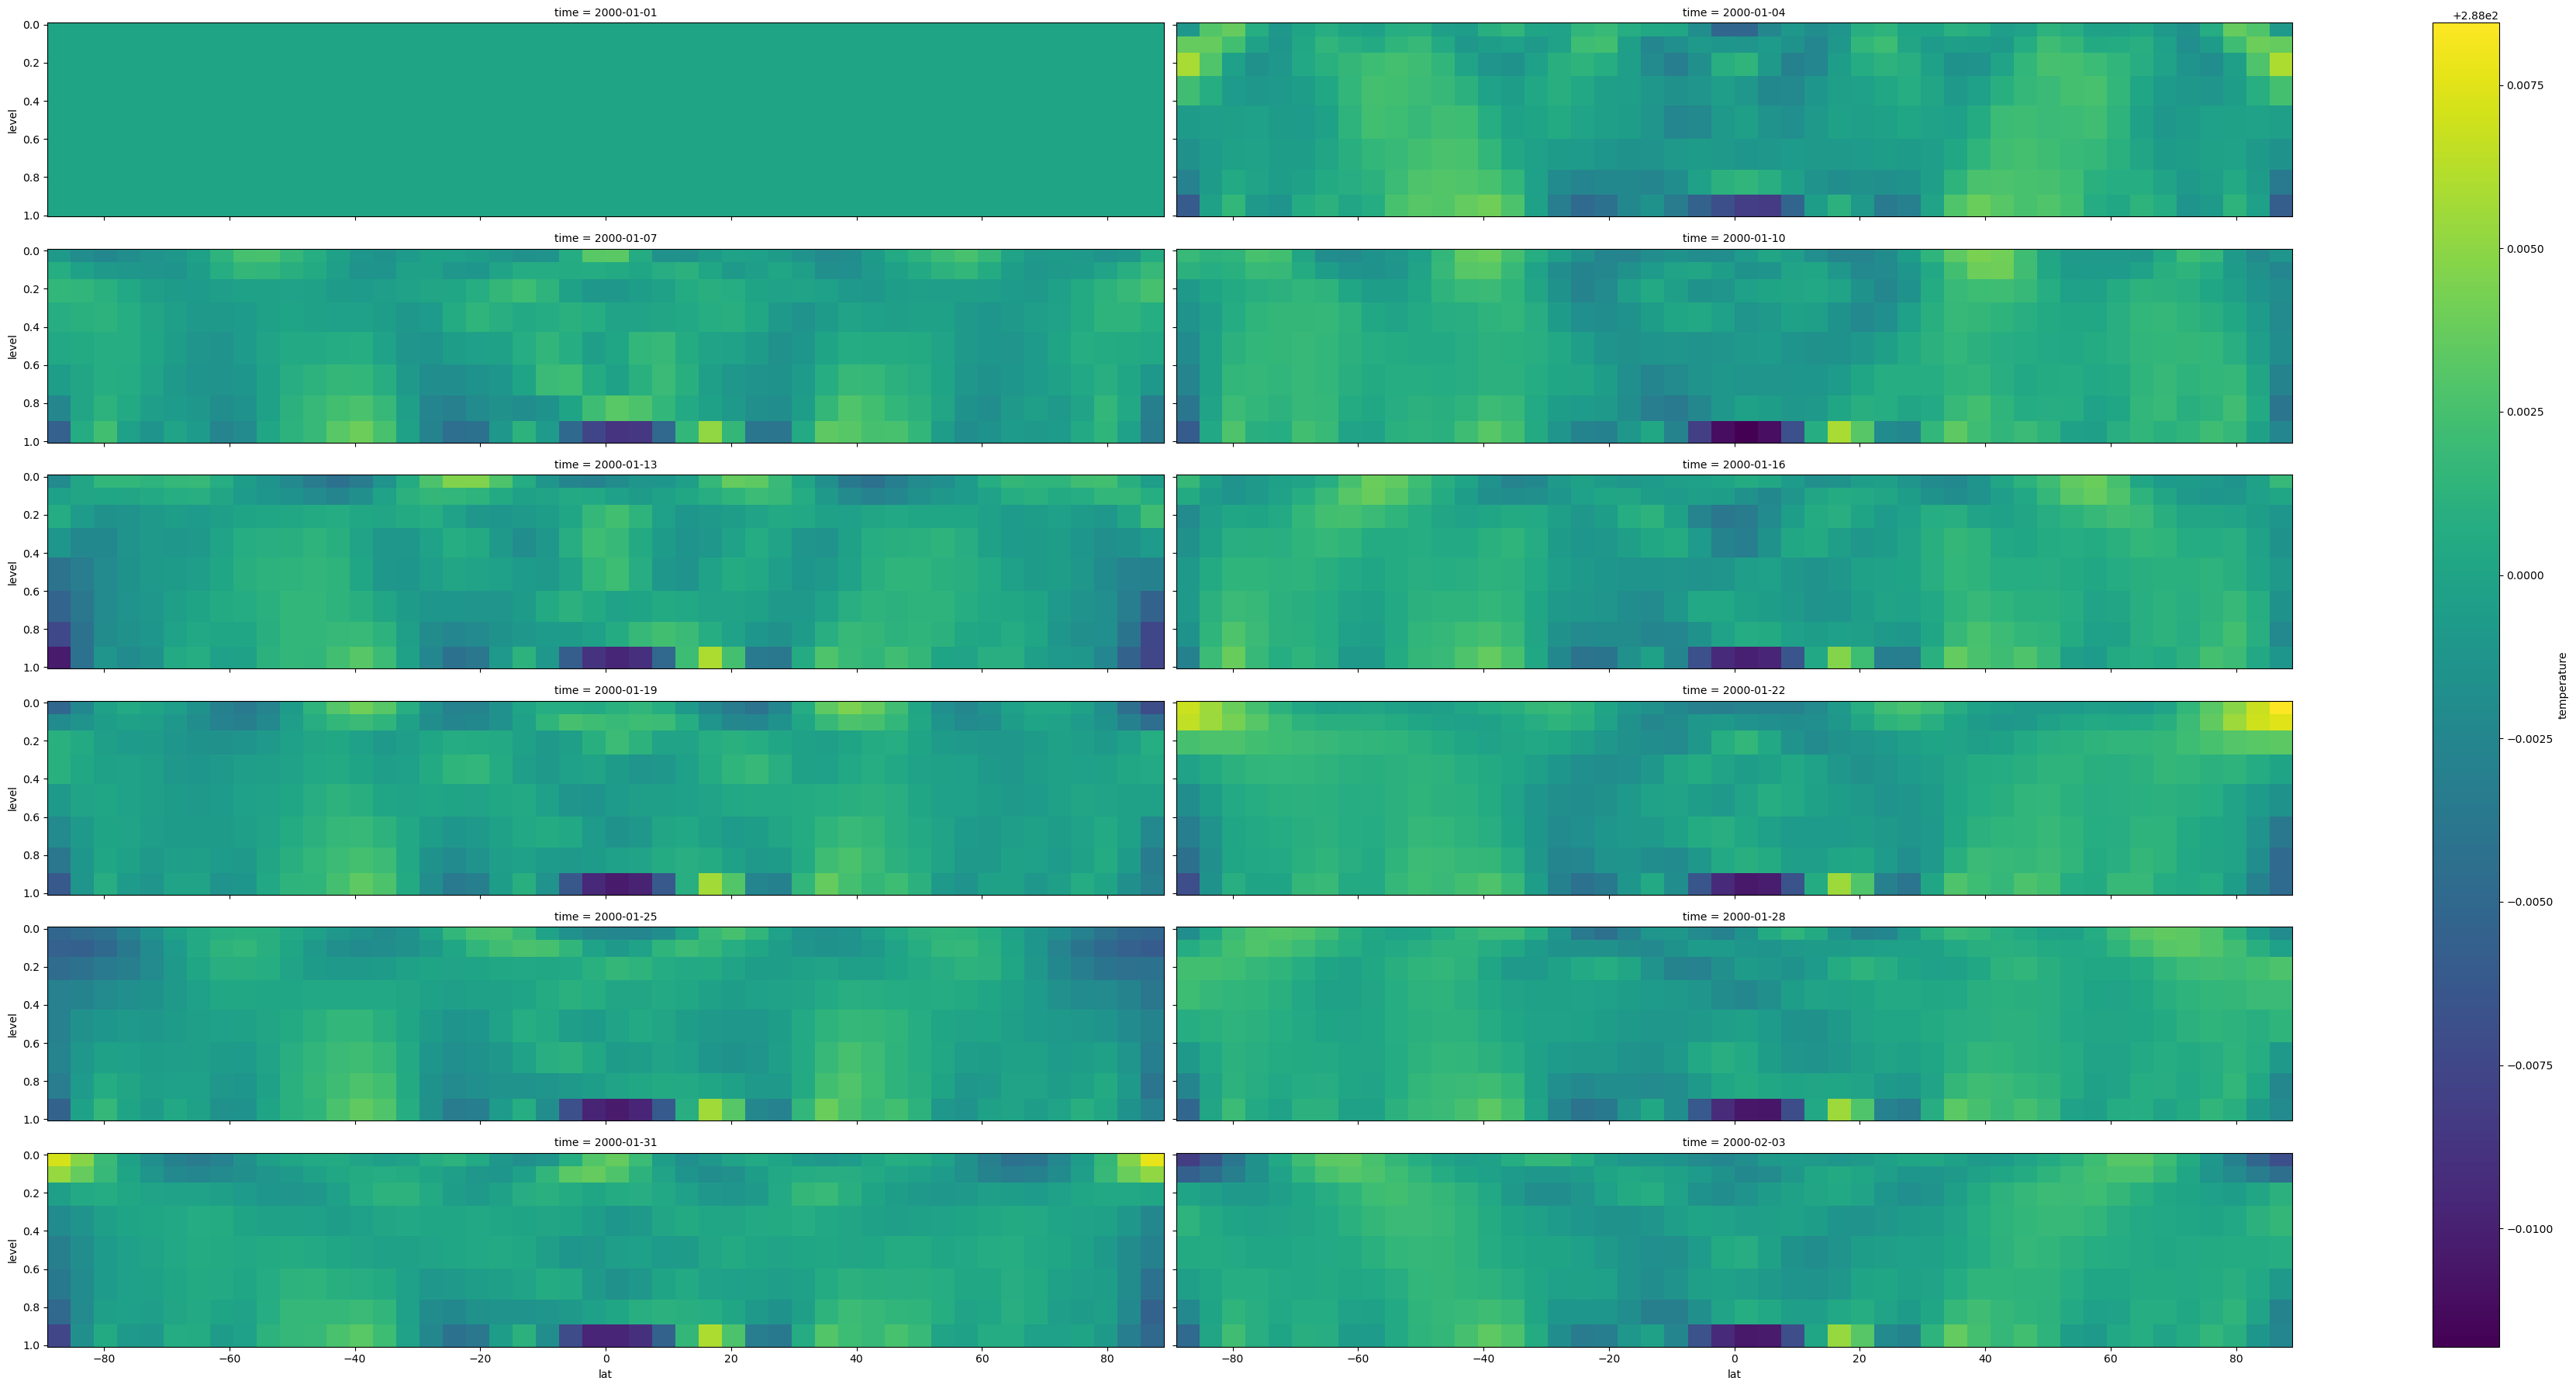

In [ ]:
pred_ds['temperature'].mean('lon').plot(x='lat', y='level', col='time', col_wrap=2, aspect=6, yincrease=False);

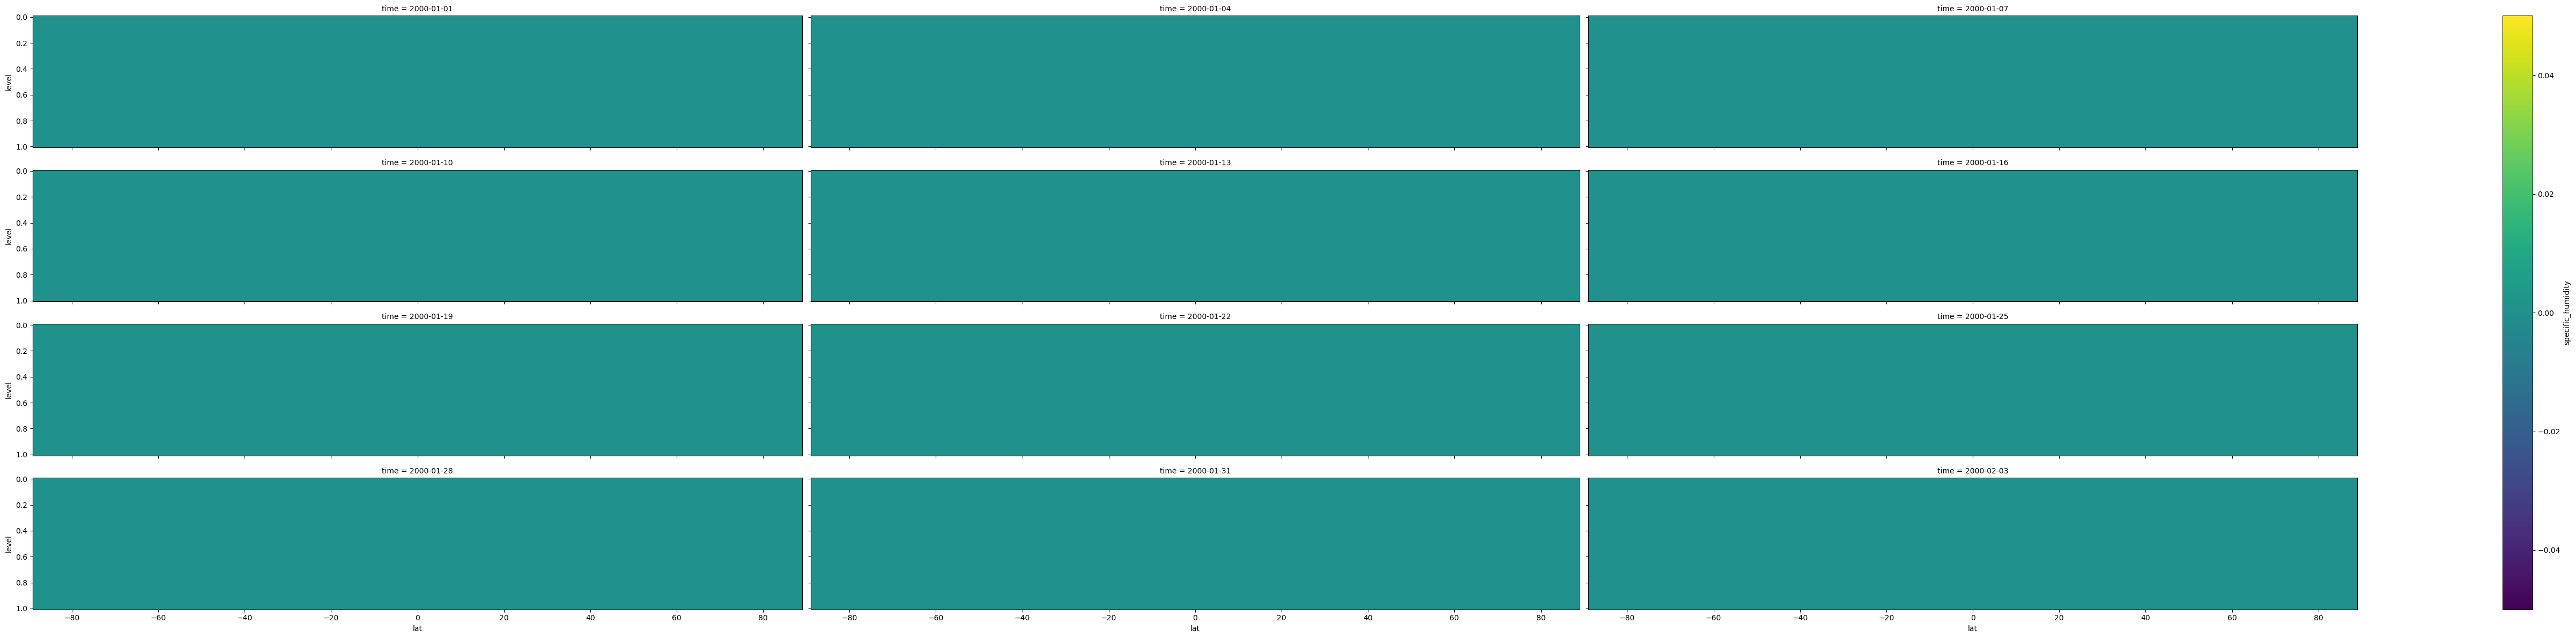

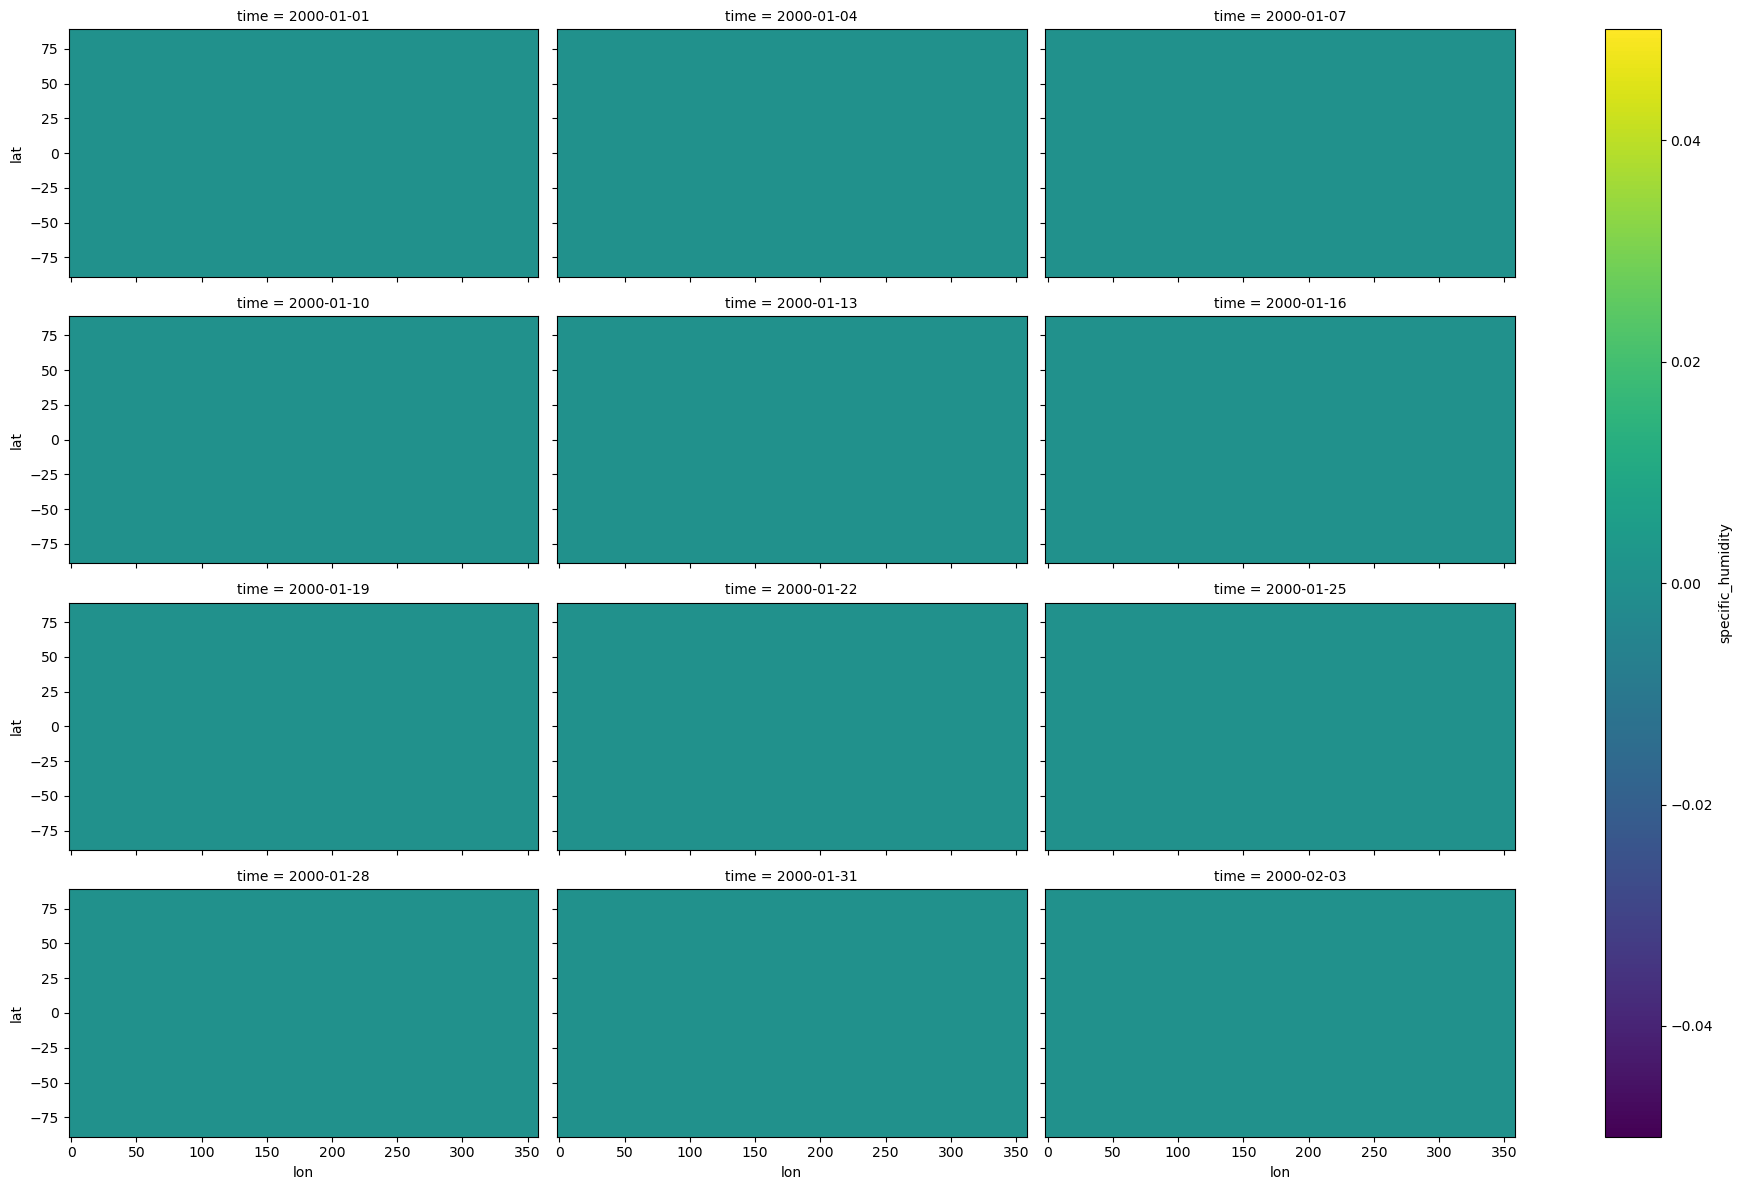

In [ ]:
pred_ds['specific_humidity'].mean('lon').plot(x='lat', y='level', col='time', col_wrap=3, aspect=6, yincrease=False);
pred_ds['specific_humidity'].isel(level=3).plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2);

### clouds!

In [ ]:
pred_ds['shortwave_rad.cloudc'].plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2);
pred_ds['shortwave_rad.qcloud'].plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2);
pred_ds['shortwave_rad.icltop'].plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2);
pred_ds['shortwave_rad.cloudstr'].plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2);

KeyError: "No variable named 'shortwave_rad.cloudc'. Variables on the dataset include ['sice_am.279', 'sice_am.232', 'soilw_am.91', 'sice_am.355', 'snowd_am.89', ..., 'sice_am.95', 'lon', 'lat', 'level', 'time']"